# 탐색적 데이터 분석

#### #01. 작업준비

1. 패키지 참조

In [5]:
import sys
sys.path.append('../')
import helper

import numpy as np
from pandas import read_excel, DataFrame, get_dummies
from matplotlib import pyplot as plt
import seaborn as sb

2. 데이터 가져오기

In [6]:
origin = read_excel("분석용데이터.xlsx")

print(origin.shape)

print(origin.info())

origin.head()

(265936, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265936 entries, 0 to 265935
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   기준_년_코드    265936 non-null  int64  
 1   기준_분기_코드   265936 non-null  int64  
 2   Covid19    265928 non-null  float64
 3   상권_코드      265936 non-null  int64  
 4   분기당_매출_금액  265928 non-null  float64
 5   주중_매출_금액   265928 non-null  float64
 6   주말_매출_금액   265928 non-null  float64
 7   남성_매출_금액   265928 non-null  float64
 8   여성_매출_금액   265928 non-null  float64
 9   점포수        265928 non-null  float64
 10  일과시간_금액    265928 non-null  float64
 11  일과이후_금액    265928 non-null  float64
 12  청년금액       265928 non-null  float64
 13  중년금액       265928 non-null  float64
 14  장년금액       265928 non-null  float64
 15  상권_코드_명    265928 non-null  object 
 16  엑스좌표_값     265928 non-null  float64
 17  와이좌표_값     265928 non-null  float64
 18  시군구_코드     265928 non-null  float64
 19  행정동_코드    

,기준_년_코드,기준_분기_코드,Covid19,상권_코드,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,...,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구명,시군구코드,도심,총_직장_인구_수,총_생활인구_수
0,2018,3,0.0,1000094,1.824475e+08,1.816677e+08,779766.0,81108758.0,83644304.0,5.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3118.0,1272175.0
1,2018,3,0.0,1000094,4.561081e+06,3.428057e+06,1133024.0,0.0,4561081.0,2.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3118.0,1272175.0
2,2018,3,0.0,1000094,8.629311e+07,7.820822e+07,8084889.0,38252844.0,48040265.0,1.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3118.0,1272175.0
3,2018,3,0.0,1000094,9.394161e+07,6.050822e+07,33433384.0,45574085.0,36140265.0,1.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3118.0,1272175.0
4,2018,3,0.0,1000094,1.692325e+09,1.354745e+09,337580548.0,489138378.0,195886445.0,1.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,3118.0,1272175.0


3. 명목형 변수에 대한 데이터 타입 변경

In [8]:
df = origin.astype({
    '기준_년_코드': 'category',
    '기준_분기_코드': 'category', 
    'Covid19': 'category', 
    '상권_코드': 'category', 
    '상권_코드_명': 'category', 
    '시군구_코드': 'category', 
    '행정동_코드': 'category', 
    '시군구명': 'category', 
    '시군구코드': 'category', 
    '도심': 'category'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265936 entries, 0 to 265935
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   기준_년_코드    265936 non-null  category
 1   기준_분기_코드   265936 non-null  category
 2   Covid19    265928 non-null  category
 3   상권_코드      265936 non-null  category
 4   분기당_매출_금액  265928 non-null  float64 
 5   주중_매출_금액   265928 non-null  float64 
 6   주말_매출_금액   265928 non-null  float64 
 7   남성_매출_금액   265928 non-null  float64 
 8   여성_매출_금액   265928 non-null  float64 
 9   점포수        265928 non-null  float64 
 10  일과시간_금액    265928 non-null  float64 
 11  일과이후_금액    265928 non-null  float64 
 12  청년금액       265928 non-null  float64 
 13  중년금액       265928 non-null  float64 
 14  장년금액       265928 non-null  float64 
 15  상권_코드_명    265928 non-null  category
 16  엑스좌표_값     265928 non-null  float64 
 17  와이좌표_값     265928 non-null  float64 
 18  시군구_코드     265928 non-null  category
 19  행정

#### #02. 연속형 변수에 대한 기초 통계량 확인

결측치 확인

In [9]:
df.isna().sum()

기준_년_코드          0
기준_분기_코드         0
Covid19          8
상권_코드            0
분기당_매출_금액        8
주중_매출_금액         8
주말_매출_금액         8
남성_매출_금액         8
여성_매출_금액         8
점포수              8
일과시간_금액          8
일과이후_금액          8
청년금액             8
중년금액             8
장년금액             8
상권_코드_명          8
엑스좌표_값           8
와이좌표_값           8
시군구_코드           8
행정동_코드           8
시군구명             8
시군구코드            8
도심               8
총_직장_인구_수    43804
총_생활인구_수     43804
dtype: int64

결측치가 있는 데이터의 내용을 확인

In [10]:
null_df = df.query('(총_직장_인구_수.isnull()) or (총_생활인구_수.isnull())')
null_df

,기준_년_코드,기준_분기_코드,Covid19,상권_코드,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,...,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구명,시군구코드,도심,총_직장_인구_수,총_생활인구_수
55,2019,1,0.0,1000094,31215652.0,31215652.0,0.0,11999503.0,19216149.0,1.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,NaN,NaN
56,2019,1,0.0,1000094,1581690.0,1172850.0,408840.0,554900.0,963086.0,1.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,NaN,NaN
57,2019,1,0.0,1000094,59065851.0,52487876.0,6577975.0,19086535.0,18442700.0,4.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,NaN,NaN
58,2019,1,0.0,1000094,20241553.0,15481426.0,4760127.0,9460553.0,10781000.0,1.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,NaN,NaN
59,2019,1,0.0,1000094,29791043.0,29791043.0,0.0,10596936.0,19194107.0,3.0,...,마장로39길,203915.0,452058.0,11200.0,11200540.0,성동구,11200.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265857,2019,2,0.0,1000651,97482396.0,73348528.0,24133868.0,74447025.0,14315794.0,6.0,...,우마길,190125.0,442624.0,11530.0,11530595.0,구로구,11530.0,0.0,NaN,NaN
265858,2019,2,0.0,1000651,57493627.0,36013219.0,21480408.0,54930553.0,2563074.0,8.0,...,우마길,190125.0,442624.0,11530.0,11530595.0,구로구,11530.0,0.0,NaN,NaN
265859,2019,2,0.0,1000651,15694335.0,13871399.0,1822936.0,5867574.0,9484961.0,3.0,...,우마길,190125.0,442624.0,11530.0,11530595.0,구로구,11530.0,0.0,NaN,NaN
265860,2019,2,0.0,1000651,5557319.0,4348532.0,1208787.0,3360572.0,2196747.0,5.0,...,우마길,190125.0,442624.0,11530.0,11530595.0,구로구,11530.0,0.0,NaN,NaN


> ###### 생활인구가 집계되지 않은 지역은 행정구에서 데이터 수집이 이루어지지 않은 것으로 보고 분석에서 제외하기로 함

결측치 정제

In [11]:
df2 = df.dropna()
df2.isna().sum()

print(df2.shape)

(222124, 25)


기초 통계량 확인

In [12]:
tmp = df2.drop(['엑스좌표_값', '와이좌표_값'], axis=1)
tmp.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
분기당_매출_금액,2.550897e+08,7.510396e+08,53.0,19381384.25,68322769.0,2.236953e+08,9.334306e+10
주중_매출_금액,1.945460e+08,6.138572e+08,-70301897.0,14430924.50,51015538.5,1.693071e+08,9.060803e+10
주말_매출_금액,6.054370e+07,1.894200e+08,-60053636.0,2446229.25,13467007.0,5.076214e+07,1.187360e+10
남성_매출_금액,1.238206e+08,3.715709e+08,0.0,7664530.50,30326435.0,1.056897e+08,4.468054e+10
여성_매출_금액,1.057898e+08,3.354464e+08,-7499697.0,6592710.00,26861672.0,9.201153e+07,2.358525e+10
점포수,4.676654e+00,6.378883e+00,0.0,2.00,3.0,5.000000e+00,3.900000e+02
일과시간_금액,1.419728e+08,5.305432e+08,-23926190.0,6694564.00,30981688.5,1.167935e+08,6.369344e+10
일과이후_금액,1.131169e+08,3.105393e+08,-86927726.0,6442846.25,26196999.0,9.320949e+07,2.964962e+10
청년금액,8.086605e+07,2.280624e+08,-3685222.0,3407537.00,16451777.5,6.565691e+07,1.568936e+10
중년금액,1.099931e+08,3.667343e+08,0.0,7627903.00,28740611.5,9.284734e+07,3.420627e+10


상자그림 확인

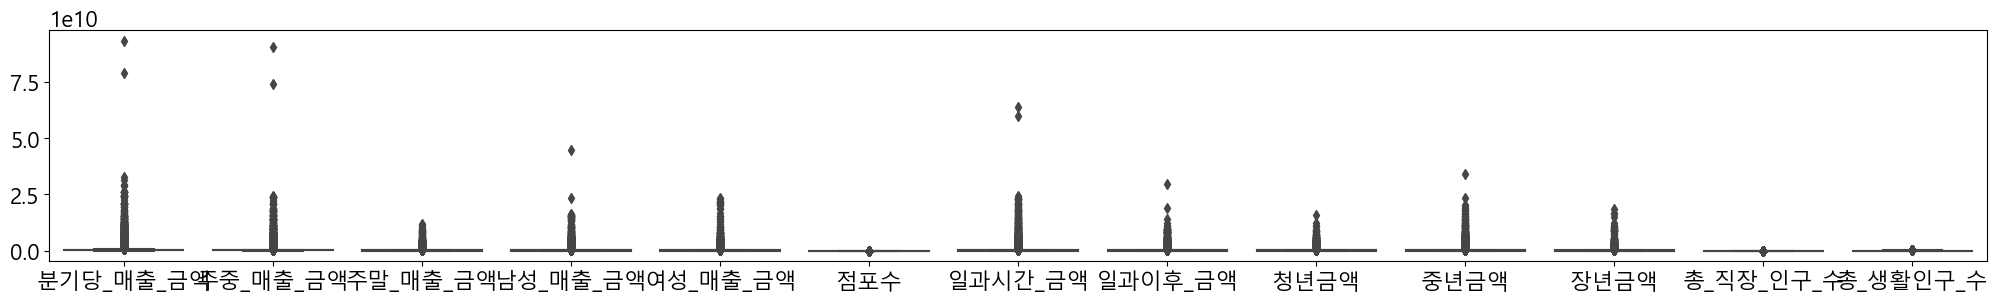

In [13]:
plt.figure(figsize=(25, 3))
sb.boxplot(tmp)
plt.show()
plt.close()

> ###### 무조건 표준화